In [1]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

In [2]:
# Definiton of the function that creates the data set.
def genDataSet(N, seed):
    # Reset PN generator.
    np.random.seed(seed)
    # Attribute.
    x = np.linspace(-6, 6, N).reshape(N, 1)
    # Fifth order target function.
    y = 2.33*x**5 + 5.3*x**4 - 3.2*x**3 + 0.5*x**2 - x + 2
    # Noise.
    w = np.random.randn(N, 1)
    # Observable function.
    y_noisy = y + w
    # Return arrays.
    return x, y_noisy, y

## Generate the dataset.

+ Objective function is a polynomial of order 5.

In [4]:
# Define number of samples.
N = 100

# Reset pseudo random generator.
seed = 0

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

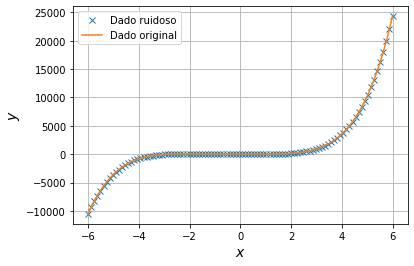

In [5]:
# Plot original data versus noisy version.
fig = plt.figure()
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y, label='Dado original')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

## Holdout with different split sizes and Shuffle=True

The holdout cross-validation strategy is implemented with the `train_test_split` function.

Example using an objective function of order 5 and an approximating polynomial also of order 5.

In [6]:
mse_val = []
mse_train = []

# (1 - p) values defines the percentage of dataset destinated for validation set
splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for split in splits:
    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=split, shuffle=True, random_state=seed)

    print('Training set size:', len(y_train))
    print('Validation set size:', len(y_val))
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])
    
    # Training
    poly_reg.fit(x_train, y_train)
    
    # Predicting with training set
    y_train_predict = poly_reg.predict(x_train)
    
    # Predicting with validation set
    y_val_predict = poly_reg.predict(x_val)

    mse_val.append(mean_squared_error(y_val, y_val_predict))

    mse_train.append(mean_squared_error(y_train, y_train_predict))

Training set size: 90
Validation set size: 10
Training set size: 80
Validation set size: 20
Training set size: 70
Validation set size: 30
Training set size: 60
Validation set size: 40
Training set size: 50
Validation set size: 50
Training set size: 40
Validation set size: 60
Training set size: 30
Validation set size: 70
Training set size: 20
Validation set size: 80
Training set size: 10
Validation set size: 90


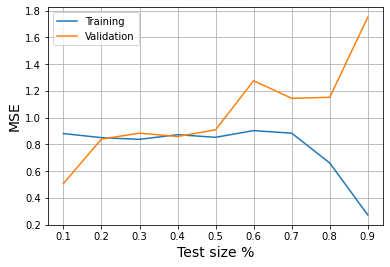

In [7]:
plt.figure()
plt.plot(splits, mse_train, label='Training')
plt.plot(splits, mse_val, label='Validation')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Test size %', fontsize=14)
plt.xticks(splits)
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

With a set of 100 examples and this seed (it will depend on the seed as we will see below) we see that

+ The training error remains virtually constant up to a training set of 30% (70% for validation), after which the model starts to **overfit** heavily to the training set data, causing the error to decay rapidly.

+ The validation error grows as the number of samples in the training set decreases (overfitting). However, after a training set with 30% of the total sample set (i.e., 70% for validation), the error grows much faster, indicating strong **overfit** of the model


## Comparing Holdout with shuffle True and False
 
### Variable test size and shuffle = True

Example using an objective function of order 5 and an approximating polynomial also of order 5.

In [8]:
mse_val_shuffle_on = []
mse_train_shuffle_on = []

# (1 - p) values defines the percentage of dataset destinated for validation set
testSizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    mse_val_shuffle_on.append([])
    mse_train_shuffle_on.append([])
    
    for seedvar in range(0, 500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        mse_val_shuffle_on[inc].append(mean_squared_error(y_val, y_val_predict))

        mse_train_shuffle_on[inc].append(mean_squared_error(y_train, y_train_predict))

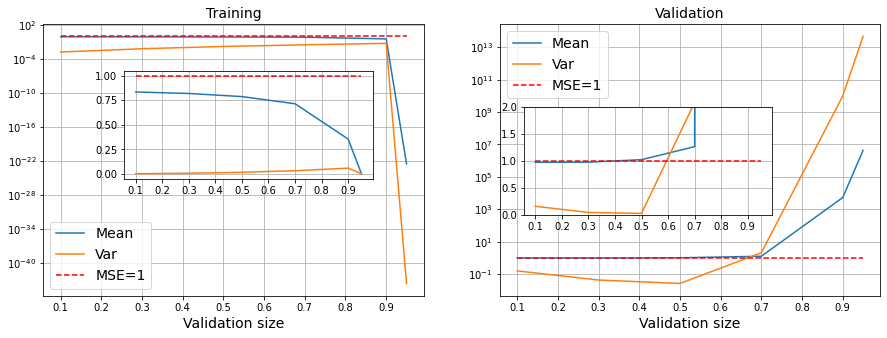

In [9]:
# Calculo da média e variância do MSE de validação para diferentes sementes.
mse_mean_val = np.zeros((len(testSizes),))
var_mean_val = np.zeros((len(testSizes),))
for k in range(0,len(testSizes)):
    mse_mean_val[k] = np.mean(mse_val_shuffle_on[k])
    var_mean_val[k] = np.var(mse_val_shuffle_on[k])

# Calculo da média e variância do MSE de treinamento para diferentes sementes.
mse_mean_train = np.zeros((len(testSizes),))
var_mean_train = np.zeros((len(testSizes),))
for k in range(0,len(testSizes)):
    mse_mean_train[k] = np.mean(mse_train_shuffle_on[k])
    var_mean_train[k] = np.var(mse_train_shuffle_on[k])

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
ax1.plot(testSizes, mse_mean_train, label='Mean')
ax1.plot(testSizes, var_mean_train, label='Var')
ax1.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax1.set_title('Training', fontsize=14)
ax1.set_xlabel('Validation size', fontsize=14)
ax1.grid()
ax1.legend(fontsize=14)
ax1.set_xticks(np.arange(0.1,1,0.1))
ax1.set_yscale('log')

left, bottom, width, height = [0.2, 0.45, 0.23, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(testSizes, mse_mean_train, label='Mean')
ax2.plot(testSizes, var_mean_train, label='Var')
ax2.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax2.set_xticks(np.arange(0.1,1,0.1))
ax2.grid()

ax3 = fig.add_subplot(122)
ax3.plot(testSizes, mse_mean_val, label='Mean')
ax3.plot(testSizes, var_mean_val, label='Var')
ax3.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax3.set_title('Validation', fontsize=14)
ax3.set_xlabel('Validation size', fontsize=14)
ax3.grid()
ax3.legend(fontsize=14)
ax3.set_xticks(np.arange(0.1,1,0.1))
ax3.set_yscale('log')

left, bottom, width, height = [0.57, 0.35, 0.23, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
ax4.plot(testSizes, mse_mean_val, label='Mean')
ax4.plot(testSizes, var_mean_val, label='Var')
ax4.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax4.set_xticks(np.arange(0.1, 1, 0.1))
ax4.grid()
ax4.set_ylim([0, 2])

plt.show()

### Conclusions

**Training**

+ The average training error decreases with the size of the training set, indicating overfitting.
+ The average error decreases faster for validation sets greater than 70%.
+ The error variance increases until after 90% it tends to zero (overfitting).
+ Why does the variance increase if the model is overfitting?
    + It is probably due to the number of samples used to estimate the variance decreases as the training base decreases, affecting the estimated value.

**Validation**

+ The validation error average remains practically constant up to 50% and then starts to increase, until from 70% this increase becomes quite fast.
+ The error variance decreases up to 50% and then starts to increase, and after 70% the increase is drastic.
    + Apparently, we can conclude that, as the error mean is around 1 and the variance reaches the lowest point at 50%, that this amount of samples results in a model bol, that is, that it generalizes well.

Validation:
test size = 0.10: MSE mean: 0.9717 - MSE var: 0.1577
test size = 0.30: MSE mean: 0.9753 - MSE var: 0.0431
test size = 0.50: MSE mean: 1.0208 - MSE var: 0.0266
test size = 0.70: MSE mean: 1.2622 - MSE var: 2.0814
test size = 0.90: MSE mean: 5313.8050 - MSE var: 9759095014.7898
test size = 0.95: MSE mean: 4312642.6982 - MSE var: 46871938720927.6719

Training:
test size = 0.10: MSE mean: 0.8345 - MSE var: 0.0017
test size = 0.30: MSE mean: 0.8191 - MSE var: 0.0066
test size = 0.50: MSE mean: 0.7874 - MSE var: 0.0165
test size = 0.70: MSE mean: 0.7142 - MSE var: 0.0324
test size = 0.90: MSE mean: 0.3545 - MSE var: 0.0586
test size = 0.95: MSE mean: 0.0000 - MSE var: 0.0000


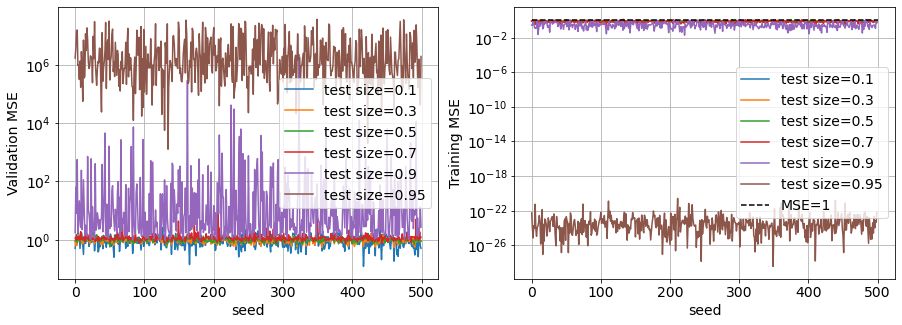

In [9]:
plt.figure(figsize=(15, 5))

print('Validation:')
ax = plt.subplot(1, 2, 1)
for k in range(0,len(testSizes)):
    plt.plot(mse_val_shuffle_on[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_val_shuffle_on[k]), np.var(mse_val_shuffle_on[k])))
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

print('\nTraining:')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(testSizes)):
    plt.plot(mse_train_shuffle_on[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_train_shuffle_on[k]), np.var(mse_train_shuffle_on[k])))
plt.plot([0, 500], [1, 1], 'k--', label='MSE=1')
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.show()

#### MSE varies with the seed used

Note that the **validation error** has a **great variation** (consequently, high variance), especially for the case where the training set is much smaller than the validation set. This happens because the model starts to overfit.

We can see that the **variation of the validation error depends on the seed** used in the **split** function, that is, the **error depends on the samples that were chosen** to be part of the training and validation sets, which need to be representative of the generating model.

This example shows the effect known as **selection bias**.

Furthermore, this example shows the effect of varying the size of the training set.

We see that the validation and training errors move away from the minimum MSE value, 1, as the training set size decreases and the validation set size increases.

As the **training set decreases** and, consequently, the **probability of having a representative set**, the model quality tends to deteriorate, resulting in a model that diverges from the optimal solution (i.e., true mapping) and presents high variance due to overfitting.

### Variable test size and shuffle = False

+ Example using an objective function of order 5 and an approximating polynomial also of order 5.

+ Realize the different sets of training and validation that will be used.

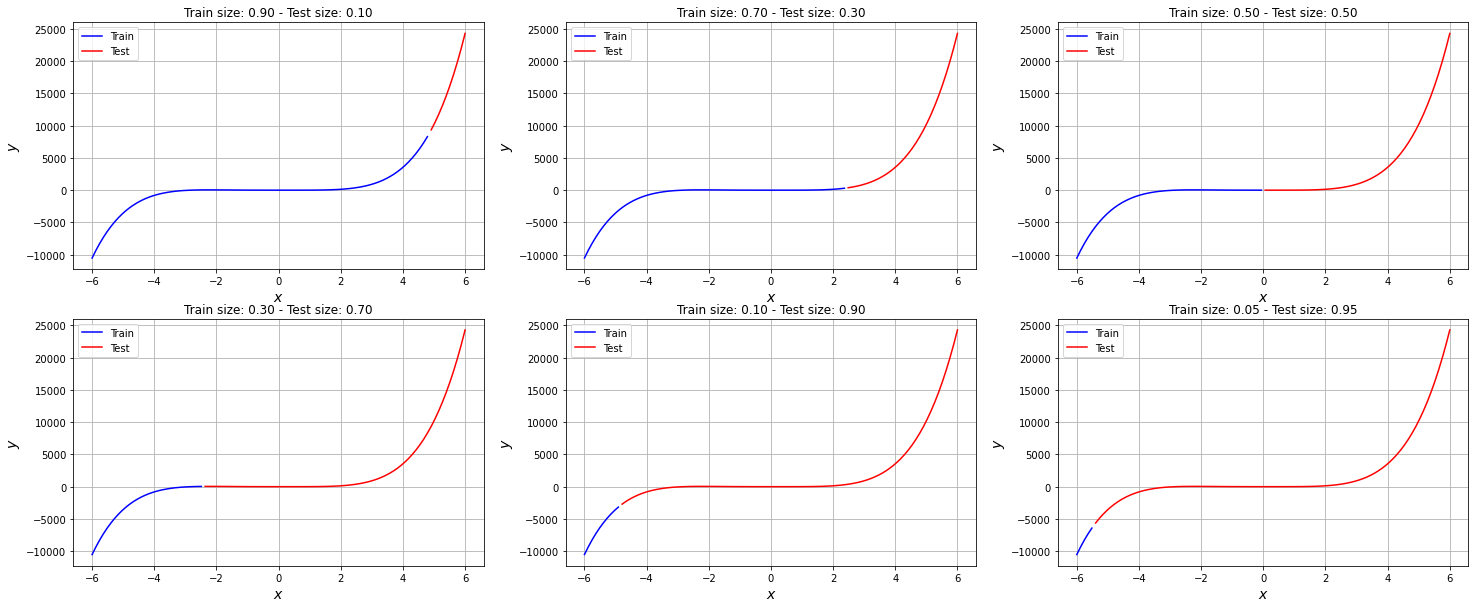

In [10]:
testSizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

plt.figure(figsize=(25, 10))
for i in range(0, len(testSizes)):
    
    # Size of the validation set.
    tsize = testSizes[i]

    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=False)
    
    ax = plt.subplot(2, len(testSizes)//2, i+1)
    plt.plot(x_train, y_train, 'b', label='Train')
    plt.plot(x_val, y_val, 'r', label='Test')
    
    plt.title('Train size: %1.2f - Test size: %1.2f' % ((1.0-tsize), tsize))
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)    
    plt.grid()
    plt.legend()
    
plt.show()

----- 0.10 -----
MSE train: 0.8955704531723622
MSE val: 0.36508827877010475
---------------------
----- 0.30 -----
MSE train: 0.8819960238718223
MSE val: 28.537410617826673
---------------------
----- 0.50 -----
MSE train: 1.0656131173309107
MSE val: 5607.009966395144
---------------------
----- 0.70 -----
MSE train: 0.9405080226468896
MSE val: 7687235.106691815
---------------------
----- 0.90 -----
MSE train: 0.43698790398085674
MSE val: 101312033338255.52
---------------------
----- 0.95 -----
MSE train: 5.459392042849982e-24
MSE val: 186778794178.19092
---------------------


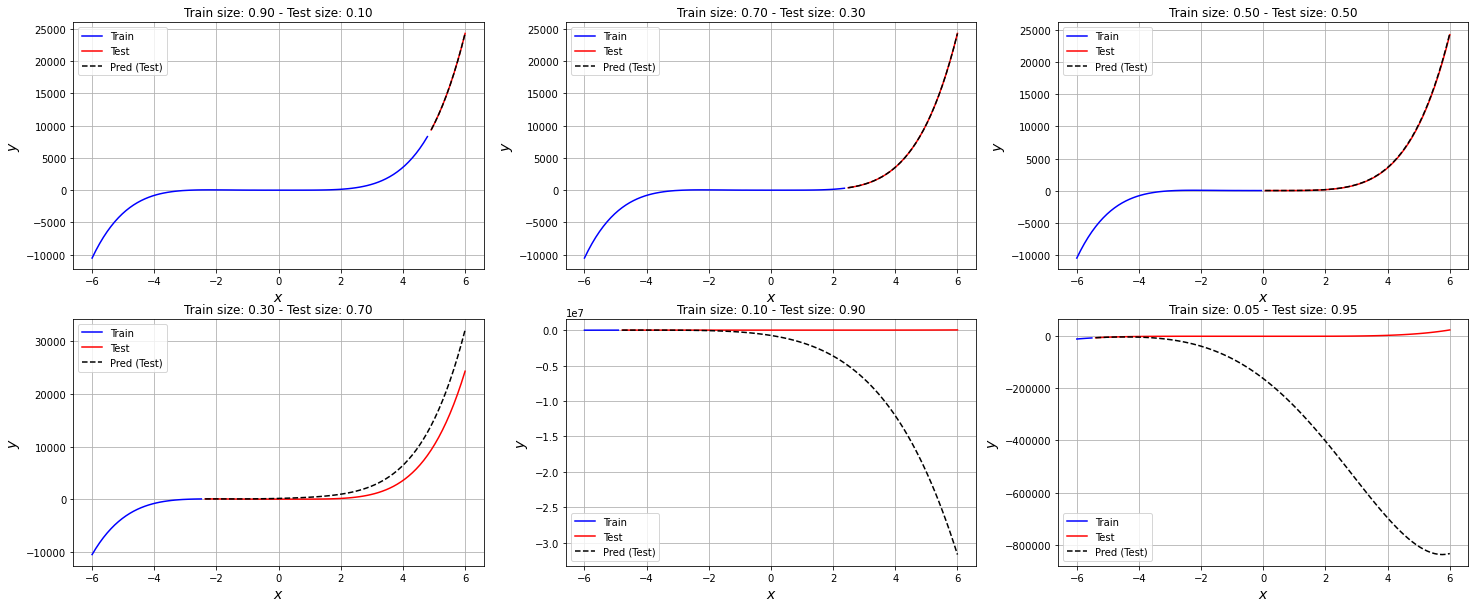

In [11]:
mse_val_shuffle_off = []
mse_train_shuffle_off = []

testSizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

plt.figure(figsize=(25, 10))
for inc in range(0, len(testSizes)):
    
    # Size of the validation set.
    tsize = testSizes[inc]

    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=False)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    poly_reg.fit(x_train, y_train)

    y_train_predict = poly_reg.predict(x_train)

    y_val_predict = poly_reg.predict(x_val)
    
    mse_val = mean_squared_error(y_val, y_val_predict)

    mse_val_shuffle_off.append(mse_val)

    mse_train = mean_squared_error(y_train, y_train_predict)
    
    mse_train_shuffle_off.append(mse_train)
    
    ax = plt.subplot(2, len(testSizes)//2, inc+1)
    plt.plot(x_train, y_train, 'b', label='Train')
    plt.plot(x_val, y_val, 'r', label='Test')
    plt.plot(x_val, y_val_predict, 'k--', label='Pred (Test)')
    
    plt.title('Train size: %1.2f - Test size: %1.2f' % ((1.0-tsize), tsize))
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)    
    plt.grid()
    plt.legend()
    
    print('----- %1.2f -----' % (tsize))
    print('MSE train:', mse_train)
    print('MSE val:', mse_val)
    print('---------------------')

Validation:
MSE mean: 16916469970884.1191 - MSE var: 1424526874632477603547578368.0000

Training:
MSE mean: 0.7034 - MSE var: 1.3700e-01


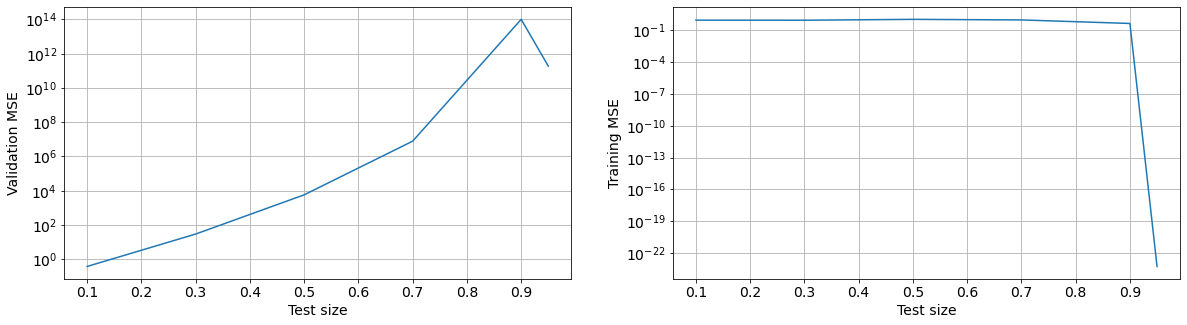

In [12]:
plt.figure(figsize=(20, 5))

print('Validation:')
print('MSE mean: %1.4f - MSE var: %1.4f' % (np.mean(mse_val_shuffle_off), np.var(mse_val_shuffle_off)))

ax = plt.subplot(1, 2, 1)
plt.plot(testSizes, mse_val_shuffle_off)
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('Test size', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0.1,1,0.1))

print('\nTraining:')
print('MSE mean: %1.4f - MSE var: %1.4e' % (np.mean(mse_train_shuffle_off), np.var(mse_train_shuffle_off)))

ax = plt.subplot(1, 2, 2)
plt.plot(testSizes, mse_train_shuffle_off)
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('Test size', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0.1,1,0.1))

plt.show()

#### Not scrambling results in high validation error.

Note that the **validation error** when the database is not shuffled before division is much larger than the validation error when data is shuffled before division.

This happens, in this example, due to the fact that without shuffling, the validation set contains a part of the database that was not used during training, that is, the training and validation sets are not representative of the generating model.

In other words, the training set contains samples from a region of the curve that are not in the validation set.

Remember that both sets must be representative with respect to the generating model.

##  k-Fold with variation of k and random seed

In [5]:
# Define the number of samples.
N = 100

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

In [6]:
kfold_mean_vec = []
kfold_std_vec = []
idx = 0
splits = [2, 6, 10]
for k in splits:
    
    kfold_mean_vec.append([])
    kfold_std_vec.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=k, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        # Calculate the cross-validation score with kfold object.
        # OBS.: All scorer objects follow the convention that higher return values are better than lower return values. 
        #       Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
        #       are available as neg_mean_squared_error which return the negated value of the metric.
        lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mean_vec[idx].append(scores.mean())
        kfold_std_vec[idx].append(scores.std())
    idx += 1

3
k = 2: MSE mean: 1.0146 - MSE var: 0.0102
k = 6: MSE mean: 0.9538 - MSE var: 0.0010
k = 10: MSE mean: 0.9485 - MSE var: 0.0004


k = 2: STD DEV mean: 0.1098 - STD DEV var:0.0059
k = 6: STD DEV mean: 0.2840 - STD DEV var:0.0069
k = 10: STD DEV mean: 0.3813 - STD DEV var:0.0070


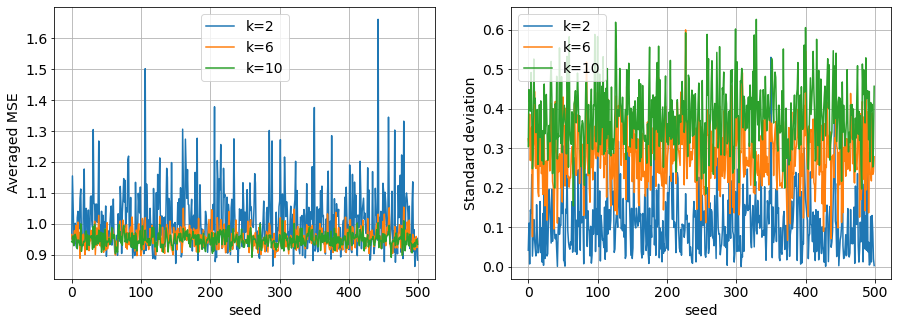

In [10]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
for k in range(0,len(splits)):
    plt.plot(kfold_mean_vec[k], label='k='+str(splits[k]))
    print('k = %d: MSE mean: %1.4f - MSE var: %1.4f' % (splits[k], np.mean(kfold_mean_vec[k]), np.var(kfold_mean_vec[k])))
plt.ylabel('Averaged MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

print('\n')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(splits)):
    plt.plot(kfold_std_vec[k], label='k='+str(splits[k]))
    print('k = %d: STD DEV mean: %1.4f - STD DEV var:%1.4f' % (splits[k], np.mean(kfold_std_vec[k]), np.var(kfold_std_vec[k])))
plt.ylabel('Standard deviation', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### Conclusions

+ The error variation due to different seeds is much smaller than with holdout.

+ The mean MSE value decreases as k increases due to the smaller number of samples used to calculate the validation MSE.

+ We see that the MSE variance decreases as k increases.
    + This is due to the higher number of holdouts used in calculating the average holdout MSE.
    + The probability of having two (k=2) non-representative validation sets is greater than when we have ten validation sets (k=10).

+ The mean value of the standard deviation increases with k as the number of samples in the validation set decreases.

## Comparison between Holdout and k-Fold

For a fairer comparison, we choose `k` and `testsize` so that the sets have approximately the same number of samples

In [16]:
# Define the number of samples.
N = 100

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

### Holdout

In [17]:
ho_mse_val_shuffle_on = []
ho_mse_train_shuffle_on = []

testSizes = [0.5, 0.3, 0.2, 0.1]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    ho_mse_val_shuffle_on.append([])
    ho_mse_train_shuffle_on.append([])
    
    for seedvar in range(0,500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        ho_mse_val_shuffle_on[inc].append(mean_squared_error(y_val, y_val_predict))

        ho_mse_train_shuffle_on[inc].append(mean_squared_error(y_train, y_train_predict))

### k-Fold

In [18]:
kfold_mse_shuffle_on = []
kfold_std_shuffle_on = []
splits = [2, 3, 5, 10]
for idx in range(0, len(splits)):
    
    kfold_mse_shuffle_on.append([])
    kfold_std_shuffle_on.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=splits[idx], shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mse_shuffle_on[idx].append(scores.mean())
        kfold_std_shuffle_on[idx].append(scores.std())

k = 2.0: MSE mean: 1.0146 - MSE var: 0.0102
t = 0.5: MSE mean: 1.0208 - MSE var: 0.0266

k = 3.0: MSE mean: 0.9734 - MSE var: 0.0035
t = 0.3: MSE mean: 0.9753 - MSE var: 0.0431

k = 5.0: MSE mean: 0.9562 - MSE var: 0.0012
t = 0.2: MSE mean: 0.9611 - MSE var: 0.0778

k = 10.0: MSE mean: 0.9485 - MSE var: 0.0004
t = 0.1: MSE mean: 0.9717 - MSE var: 0.1577



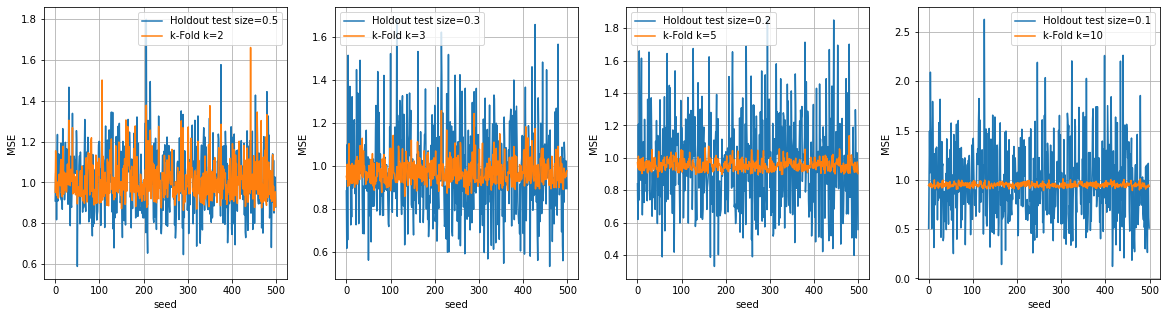

In [19]:
plt.figure(figsize=(20, 5))

for k in range(0,len(splits)):
    
    print('k = %1.1f: MSE mean: %1.4f - MSE var: %1.4f' % (splits[k], np.mean(kfold_mse_shuffle_on[k]), np.var(kfold_mse_shuffle_on[k])))
    print('t = %0.1f: MSE mean: %1.4f - MSE var: %1.4f\n' % (testSizes[k], np.mean(ho_mse_val_shuffle_on[k]), np.var(ho_mse_val_shuffle_on[k])))
    
    ax = plt.subplot(1, len(splits), k+1)
    plt.plot(ho_mse_val_shuffle_on[k], label='Holdout test size='+str(testSizes[k]))
    plt.plot(kfold_mse_shuffle_on[k], label='k-Fold k='+str(splits[k]))
    plt.ylabel('MSE')
    plt.xlabel('seed')
    plt.grid()
    plt.legend()

plt.show()

#### Conclusions

+ As we can see, the **k-Fold presents less variation of the error** in relation to the change of the **seed**, this becomes more evident as k increases.

+ As a consequence of a smaller error variance, the **k-Fold presents a smaller error variance**, which corresponds to a smaller dependence on how the training and validation sets were created.

+ That is, the way k-Fold works makes the **sets more representative** than the sets created with the Holdout strategy.

## Leave-P-Out

The `p` values ​​that will be used are: 1, 2, and 3, which leads to the following combination amounts:

$p=1 \to 100$

$p=2 \to 4950$

$p=3 \to 161700$

In [11]:
N = 100

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

In [12]:
lpo_mse = []
lpo_std = []

psizes = [1, 2, 3]

for inc in range(0, len(psizes)):

    lpocv = LeavePOut(p=psizes[inc])

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = -lin_scores
    lpo_mse.append(scores.mean())
    lpo_std.append(scores.std())        

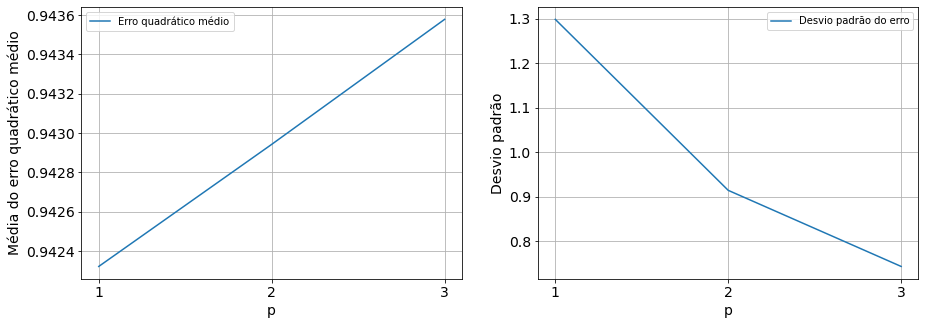

In [13]:
# Plot results.
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(psizes, lpo_mse, label='Erro quadrático médio')
plt.xlabel('p', fontsize=14)
plt.ylabel('Média do erro quadrático médio', fontsize=14)
plt.xticks(psizes)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
plt.plot(psizes, lpo_std, label='Desvio padrão do erro')
plt.xlabel('p', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(psizes)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Show the plot.
plt.show()

#### Conclusions

+ The mean of the MSE tends towards 1 (i.e., the smallest possible value for the error) as the number of samples in the validation set increases.

+ The standard deviation (i.e., the variance) decreases as the number of samples in the validation set increases.

+ Both behaviors are due to the fact that we have more samples to calculate the MSE of a training set and more MSEs to calculate the average due to the greater number of combinations.